In [1]:
#분석
import pandas as pd
import numpy as  np
import random as rnd

In [14]:
# 시각화
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

- Survival 생존여부 0=No 1=Yes
- pclass 사회-경제적지위 1=1st, 2=2nd, 3=3rd
- sex : 성별
- Age : 나이
- sibsp : 타이타닉호에 탑승한 형제-자매 수
- parch ; 타이타닉호에 탑승한 부모-자녀 수
- ticket : 티켓번호
- fare : 탑승 요금
- cabin : 방번호
- embarked : 탑승 지역(항구 위치)
C = Cherbourg,
  Q = Queenstown,
S = Southampton

In [5]:
#등급 확인.
print(train_df['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [6]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [7]:
train_df.groupby('Pclass')['Survived'].mean() #pclass가 좋을 수록 survived 확률이 높음

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### 시각화

In [8]:
train_df.corr() # 상관관계 분석, pclass와 survived 값이 -0.34 로 상관관계가 어느정도로 있는 것으로 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

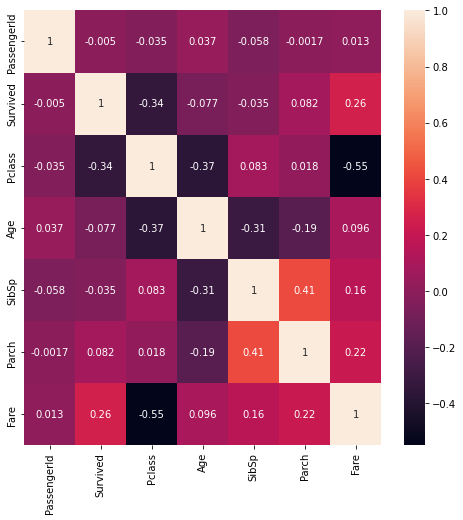

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=train_df.corr(), annot=True)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

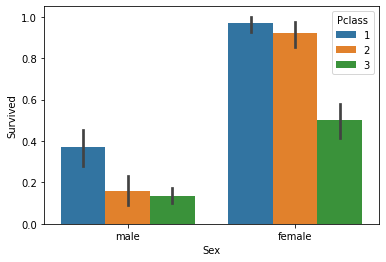

In [10]:
# 성별과 선실에 따른 생존여부 확인.
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)